# **INITIAL IMPORTING, OVERVIEW AND CLEANING OF THE DATA**

Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('anxiety_depression_data.csv')

Saving anxiety_depression_data.csv to anxiety_depression_data (7).csv


Listing columns and length of columns to check for missing values, then printing first 5 rows as well to view the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

In [ ]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


Medication use and substance use both have a significant amount of missing values, so can either drop those two columns completely or get rid of all rows in the dataset with missing values for those two.

In [ ]:
# one hypothetical option, getting rid of all rows in the table with a missing value (either in substance use or medication use)

df1 = df.dropna(subset=['Substance_Use', 'Medication_Use'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 5 to 1188
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            140 non-null    int64  
 1   Gender                         140 non-null    object 
 2   Education_Level                140 non-null    object 
 3   Employment_Status              140 non-null    object 
 4   Sleep_Hours                    140 non-null    float64
 5   Physical_Activity_Hrs          140 non-null    float64
 6   Social_Support_Score           140 non-null    int64  
 7   Anxiety_Score                  140 non-null    int64  
 8   Depression_Score               140 non-null    int64  
 9   Stress_Level                   140 non-null    int64  
 10  Family_History_Mental_Illness  140 non-null    int64  
 11  Chronic_Illnesses              140 non-null    int64  
 12  Medication_Use                 140 non-null    object 

The above option leaves us with just 140 rows/data points for analysis

In [ ]:
# other hypothetical option, getting rid of medication use and substance use columns completely

df2 = df.drop(['Medication_Use', 'Substance_Use'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Therapy                        1200 non-null   i

This options allows us to keep all 1200 rows, however we have two less columns for analysis

**We decided to go with option 2, keeping the majority of our data points while sacrificing a couple columns (frequency of medication use and substance use)**

# **Summary Statistics**

For numeric columns:

In [ ]:
numeric_summary = df2.describe().T   # transpose columns for readability
print("Numeric Summary Statistics:")
print(numeric_summary)

Numeric Summary Statistics:
                                count       mean        std   min   25%   50%  \
Age                            1200.0  46.317500  16.451157  18.0  33.0  46.0   
Sleep_Hours                    1200.0   6.469000   1.529550   2.0   5.4   6.4   
Physical_Activity_Hrs          1200.0   2.005750   2.037818   0.0   0.6   1.4   
Social_Support_Score           1200.0   5.055000   2.652893   1.0   3.0   5.0   
Anxiety_Score                  1200.0  10.470000   5.911138   1.0   5.0  10.5   
Depression_Score               1200.0  10.674167   5.632889   1.0   6.0  11.0   
Stress_Level                   1200.0   5.000833   2.538281   1.0   3.0   5.0   
Family_History_Mental_Illness  1200.0   0.318333   0.466024   0.0   0.0   0.0   
Chronic_Illnesses              1200.0   0.267500   0.442840   0.0   0.0   0.0   
Therapy                        1200.0   0.210000   0.407478   0.0   0.0   0.0   
Meditation                     1200.0   0.399167   0.489931   0.0   0.0   0.0   


For categorical columns:

In [ ]:
# filtering down to categorical columns
categorical_cols = df2.select_dtypes(include=['object']).columns

print("Categorical Variable Frequency Tables")
for col in categorical_cols:
    print(f"\n--- {col} ---")

    # Frequency counts
    print(df2[col].value_counts())

    print("\nPercentages:")
    print(df2[col].value_counts(normalize=True) * 100)


Categorical Variable Frequency Tables

--- Gender ---
Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64

Percentages:
Gender
Female        47.416667
Male          43.333333
Non-Binary     7.500000
Other          1.750000
Name: proportion, dtype: float64

--- Education_Level ---
Education_Level
PhD            262
High School    242
Master's       242
Other          240
Bachelor's     214
Name: count, dtype: int64

Percentages:
Education_Level
PhD            21.833333
High School    20.166667
Master's       20.166667
Other          20.000000
Bachelor's     17.833333
Name: proportion, dtype: float64

--- Employment_Status ---
Employment_Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name: count, dtype: int64

Percentages:
Employment_Status
Employed      26.666667
Student       25.833333
Unemployed    24.000000
Retired       23.500000
Name: proportion, dtype: float64


# **Exploratory Visualizations**

Our research question is whether anxiety and depression can be predicted without advanced biological data, so we need to examine both variables as targets. This includes examining the distributions of these variables (using histograms), examining the correlation between the numeric non-binary predictors and the targets (using heatmaps and scatter plots), and also seeing how binary numeric predictors and categorical predictors affect the target variables (using box plots).

Plotting the distribution of our two target variables

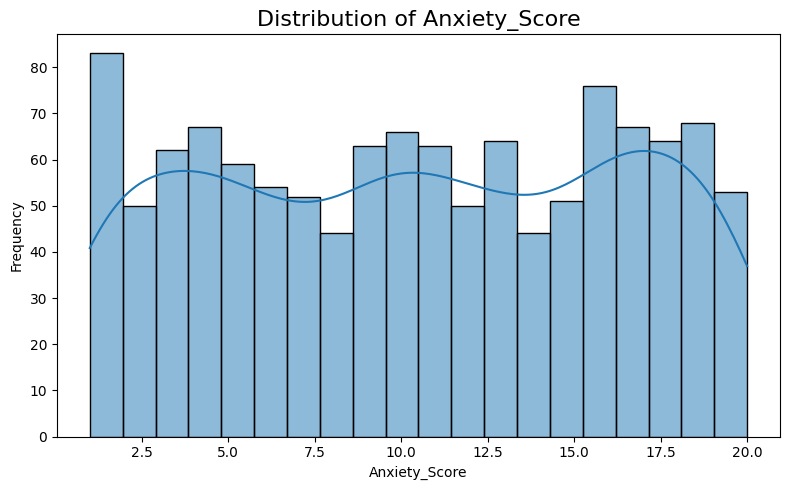

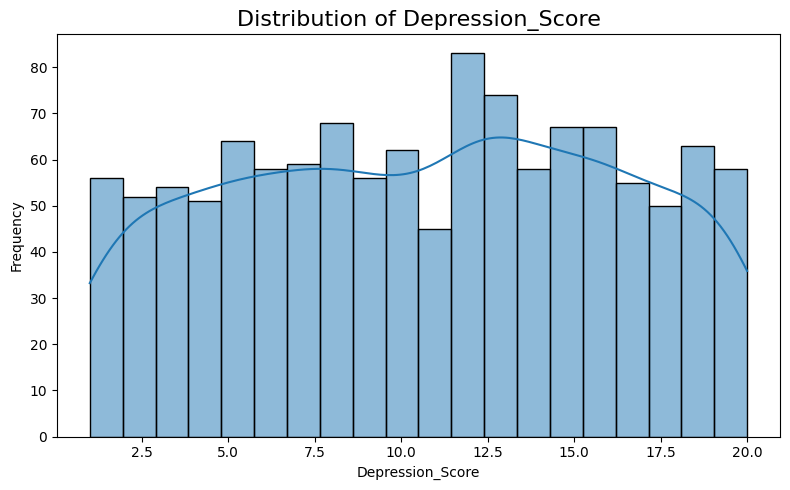

In [ ]:
# List of target variables
targets = ['Anxiety_Score', 'Depression_Score']

# Create histograms for each target variable
for col in targets:
    plt.figure(figsize=(8, 5))
    sns.histplot(df2[col], bins=20, kde=True, edgecolor='black')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Creating a correlation heatmap for non-binary numeric columns

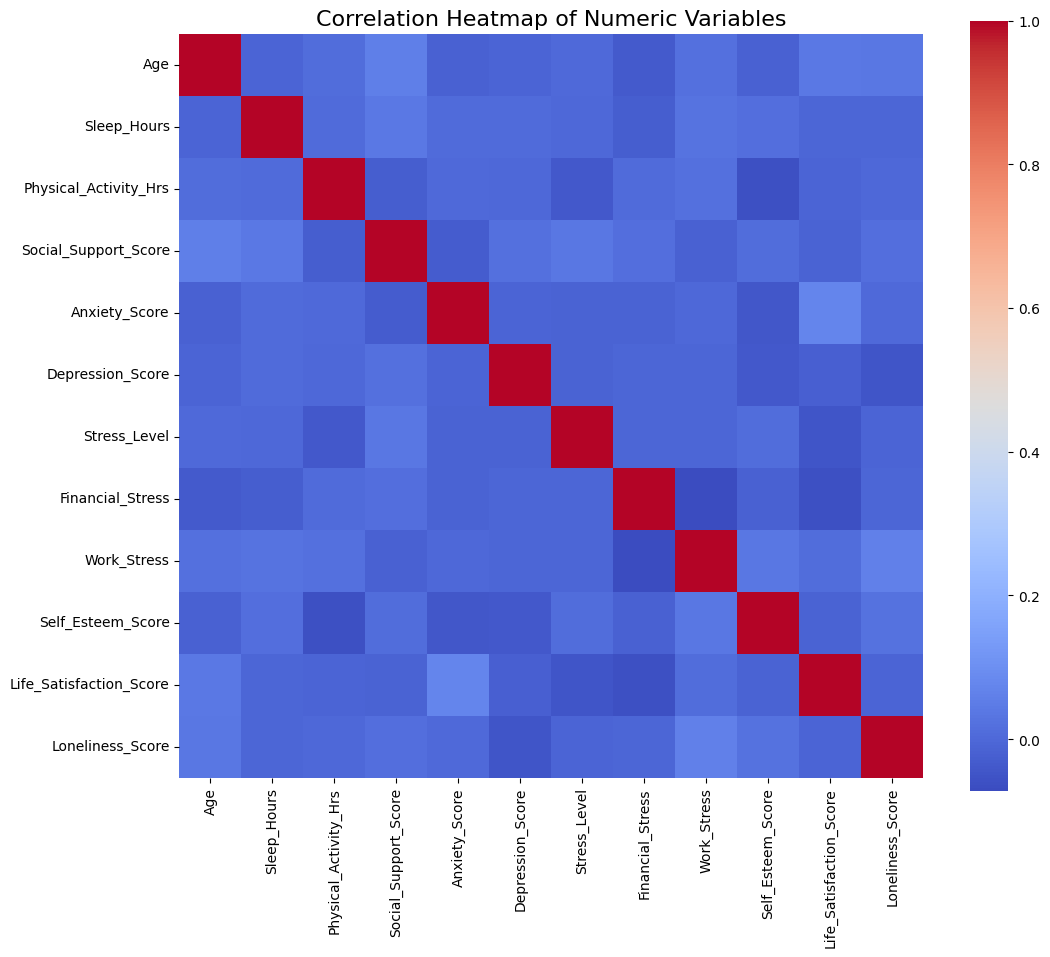

In [ ]:
# selecting numeric columns only
numeric_df = df2.select_dtypes(include=['int64', 'float64'])

# Remove binary variables
nonbinary_numeric_df = numeric_df.loc[:, numeric_df.apply(lambda col: col.nunique() > 2)]

# compute correlation matrix
corr = nonbinary_numeric_df.corr()

# plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.show()

Creating scatter plots for relationships between non-binary numeric predictors and anxiety/depression scores

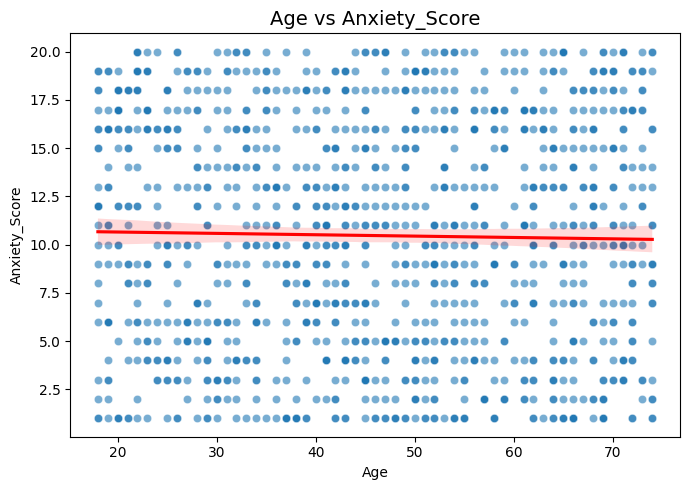

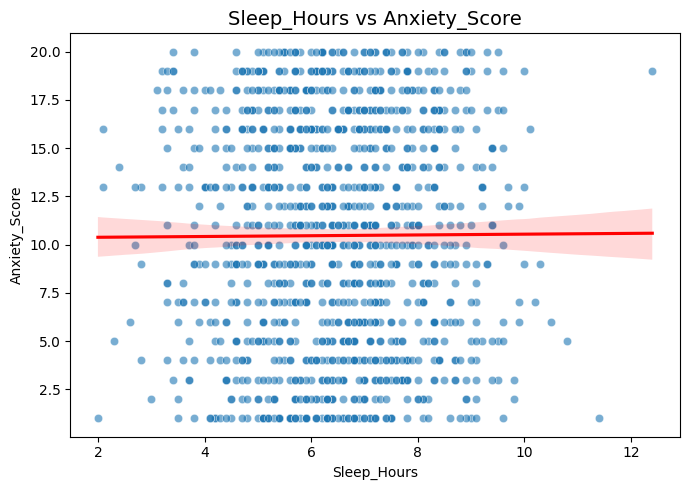

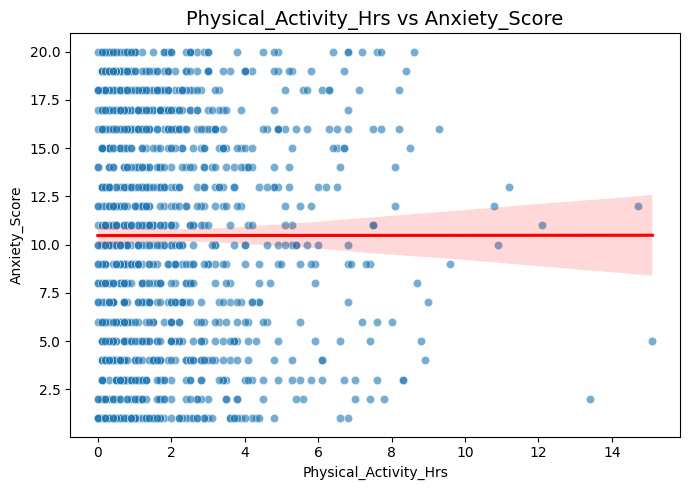

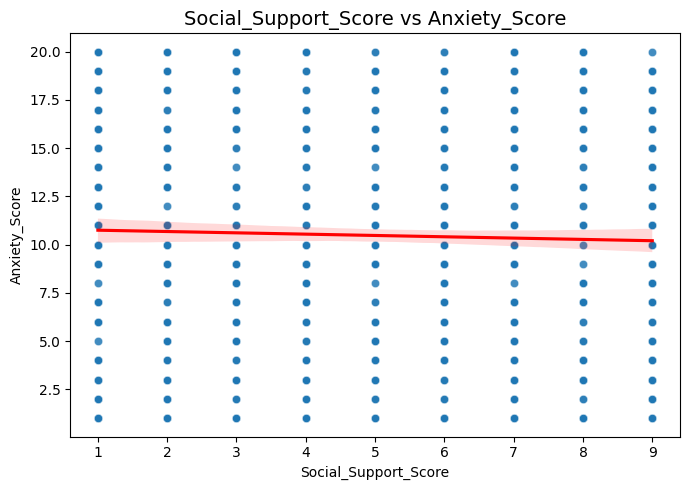

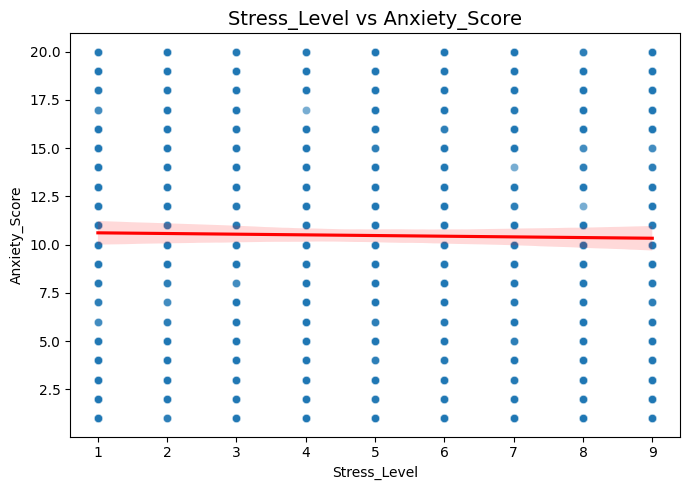

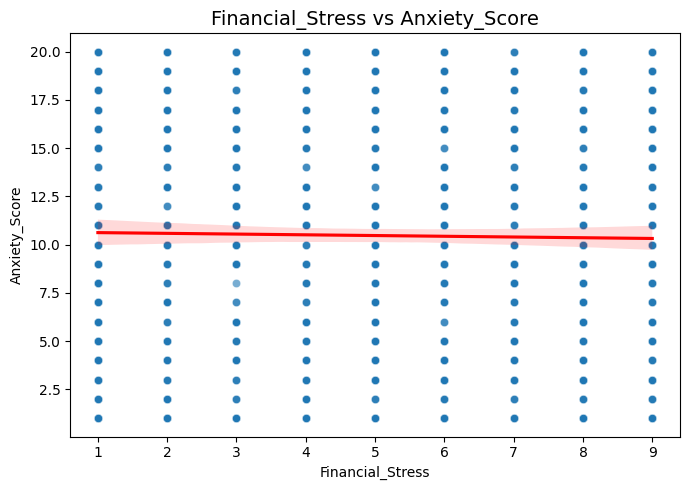

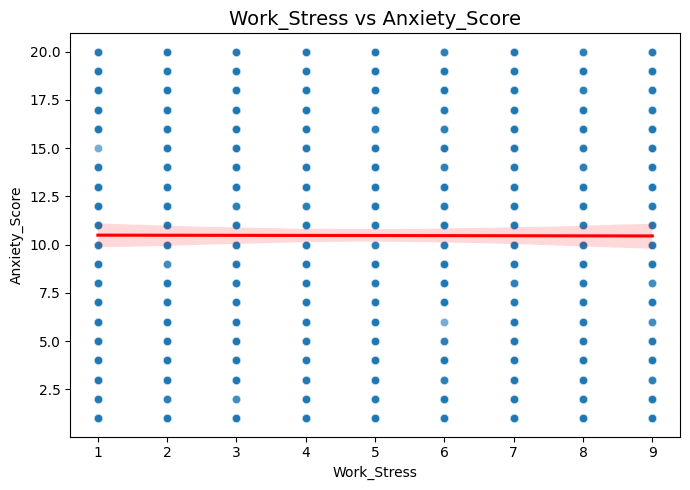

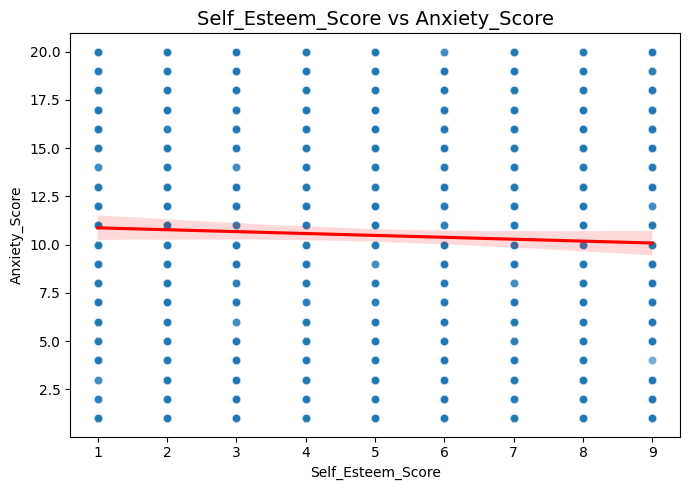

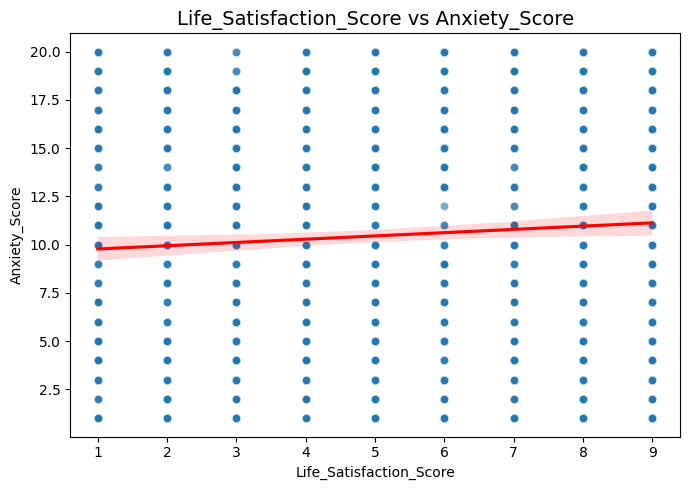

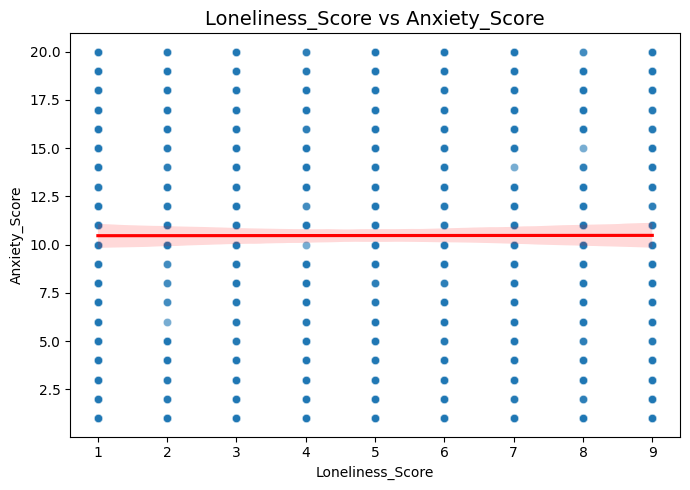

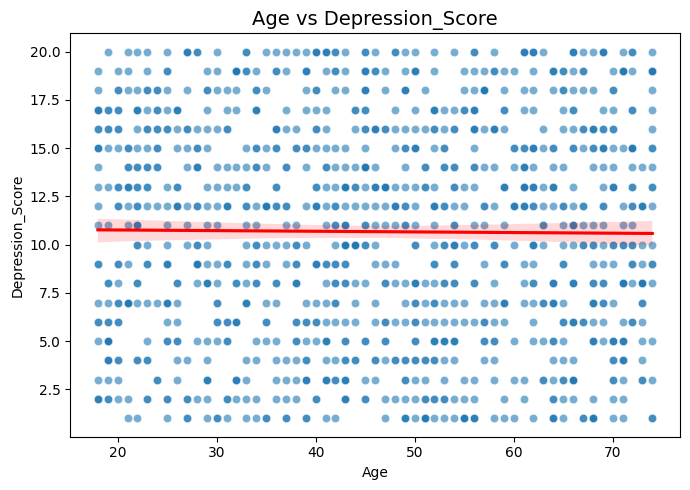

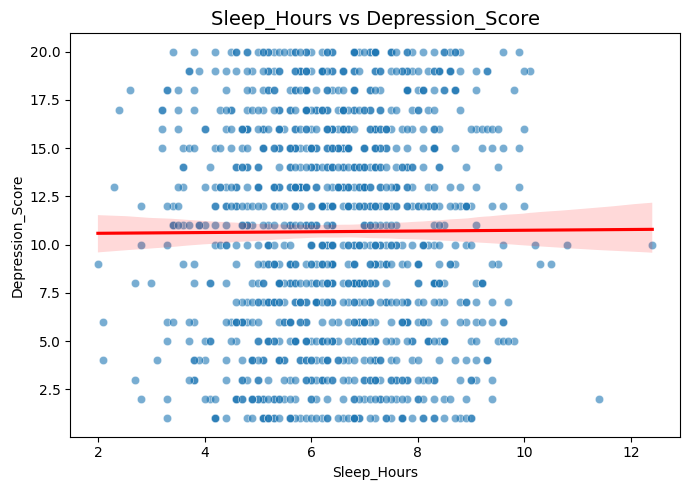

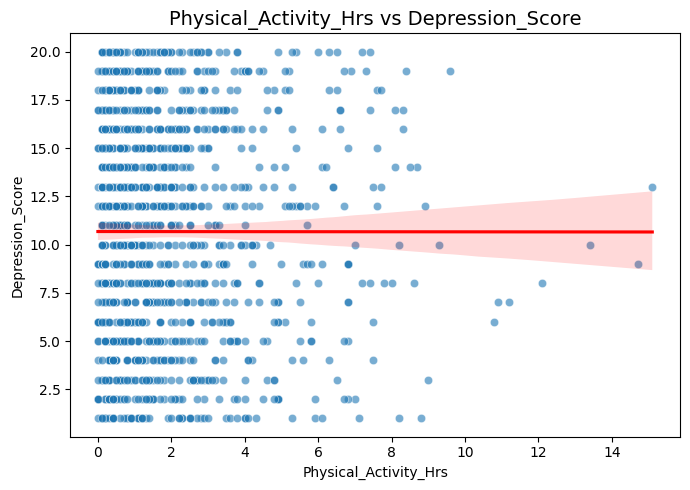

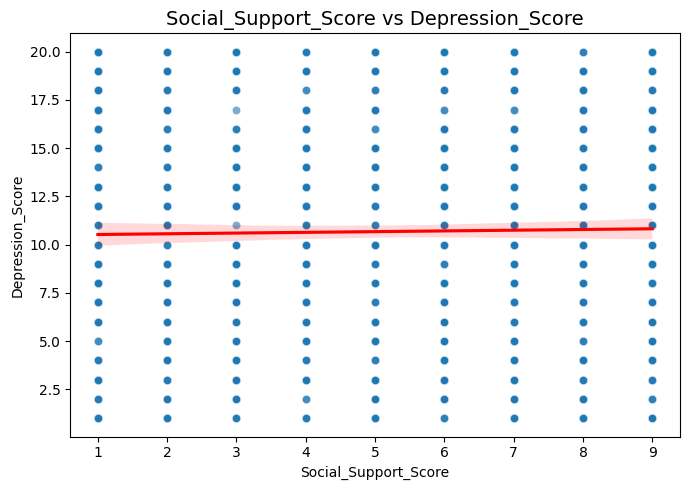

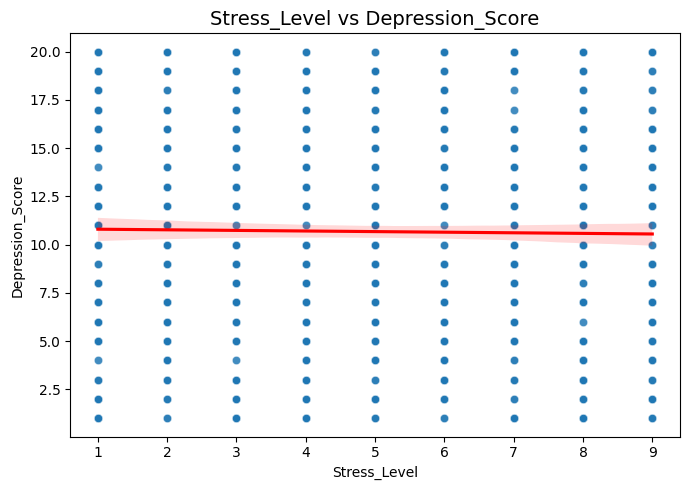

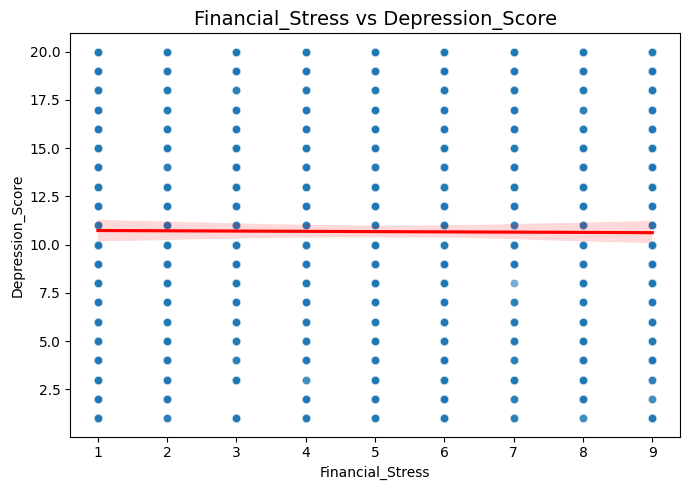

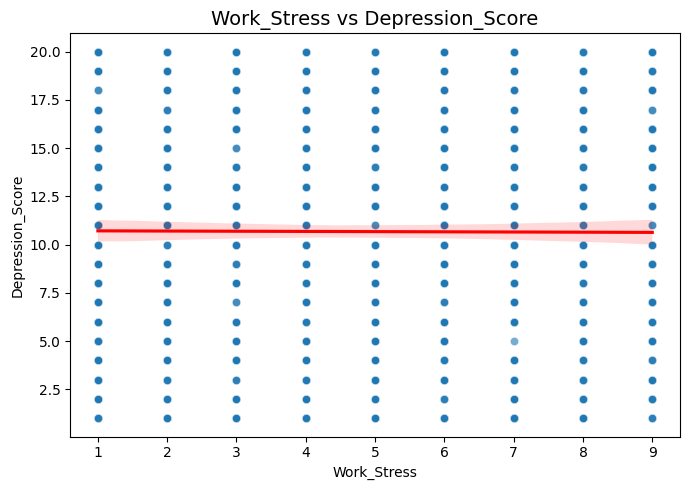

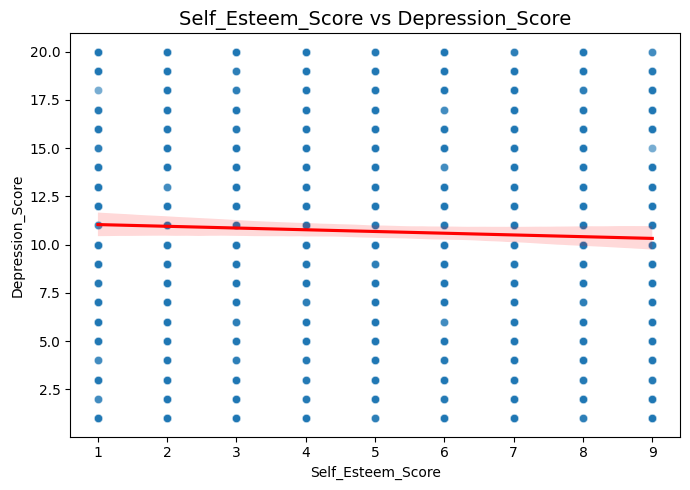

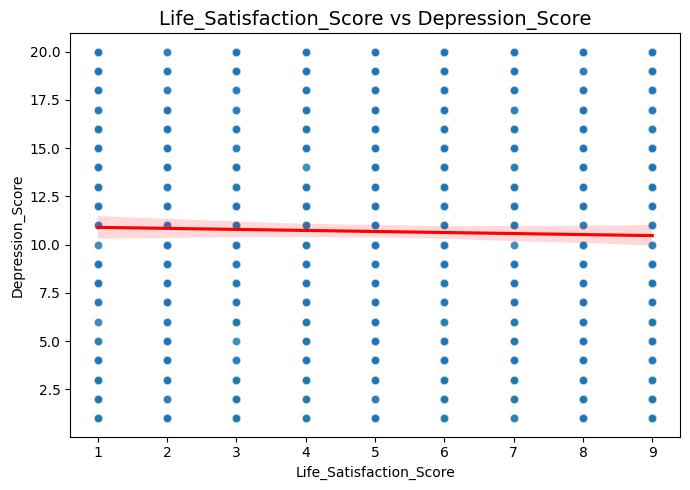

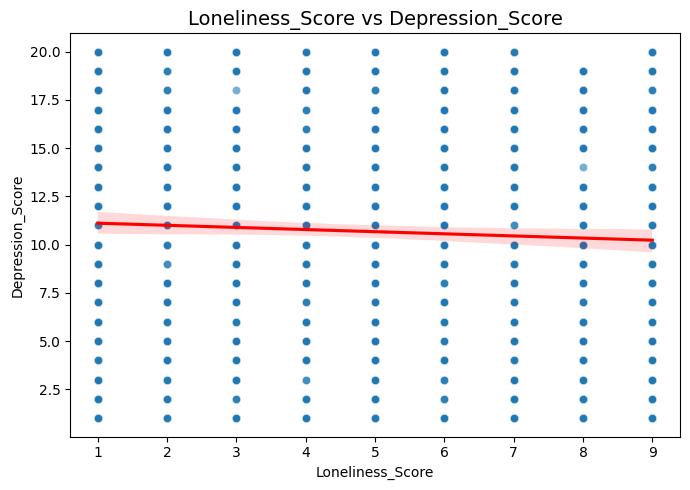

In [ ]:
# declaring targets again
targets = ['Anxiety_Score', 'Depression_Score']

# excluding targets from numeric predictors
numeric_cols = df2.select_dtypes(include=['int64', 'float64']).columns
predictors = [col for col in numeric_cols if col not in targets]

# removing binary variables as well
predictors = [col for col in predictors if df2[col].nunique() > 2]

# looping through predictors and creating scatter plots for each target
for target in targets:
    for predictor in predictors:
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=df2, x=predictor, y=target, alpha=0.6)
        sns.regplot(data=df2, x=predictor, y=target,
                    scatter=False, color='red') # regression line
        plt.title(f"{predictor} vs {target}", fontsize=14)
        plt.xlabel(predictor)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()


Creating box plots for distribution of the target variables for each of the two values in the binary numeric predictors (family history of mental illness, chronic illness, therapy, and meditation)

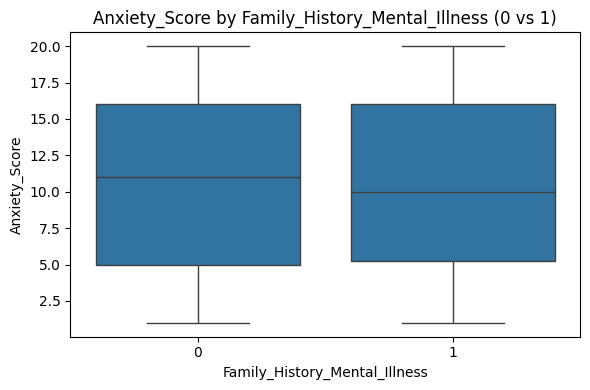

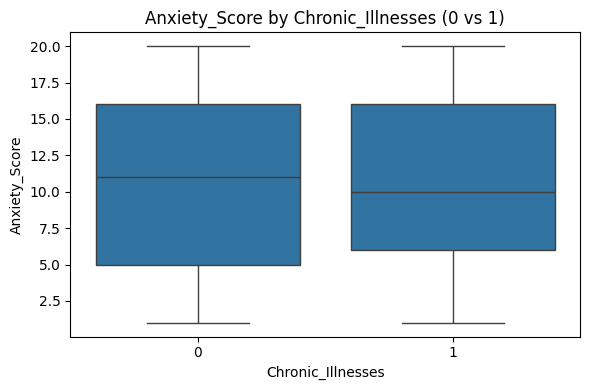

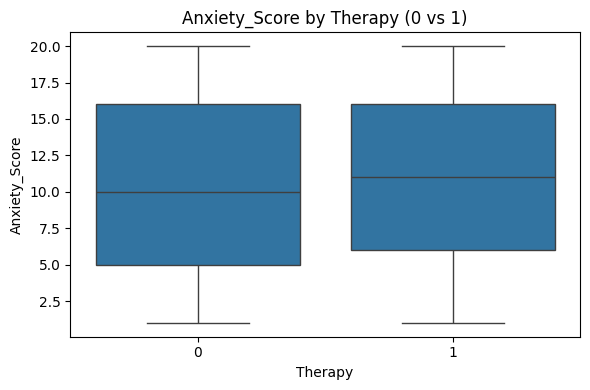

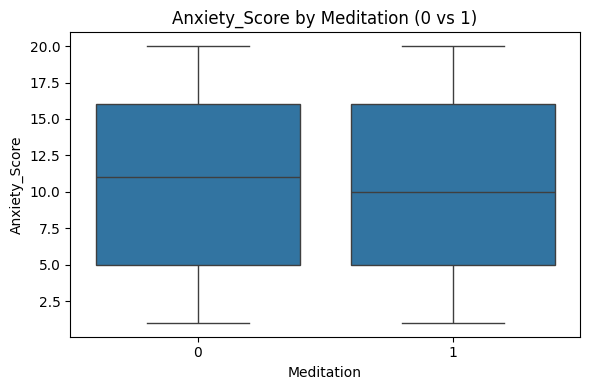

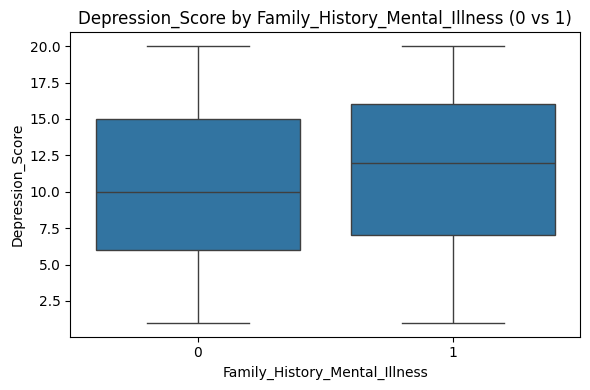

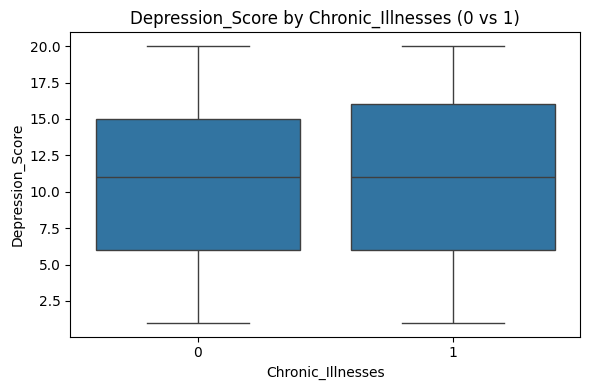

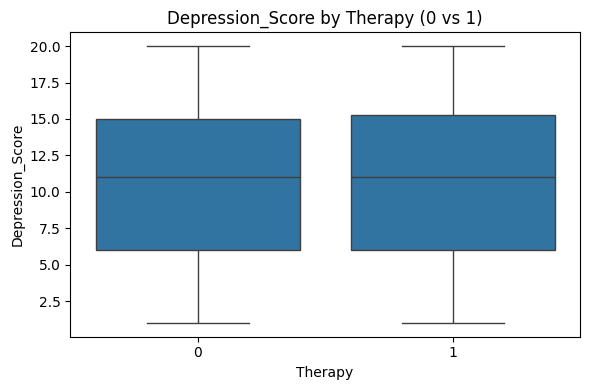

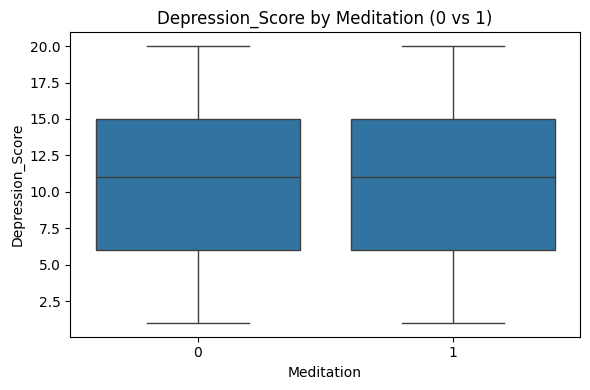

In [ ]:
binary_cols = [col for col in df2.select_dtypes(include=['int64']).columns
               if df2[col].nunique() == 2]

targets = ['Anxiety_Score', 'Depression_Score']

for target in targets:
    for col in binary_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df2[col], y=df2[target])
        plt.title(f"{target} by {col} (0 vs 1)")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

Doing the same thing for categorical variables, creating box plots for distributions of target variables for each value of the categorical variables

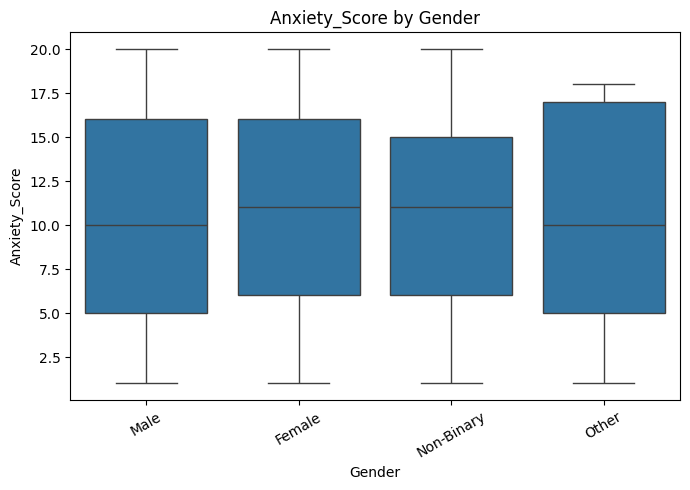

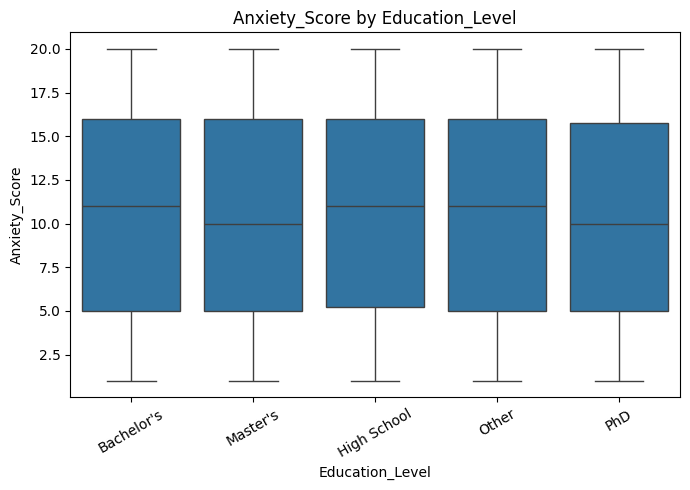

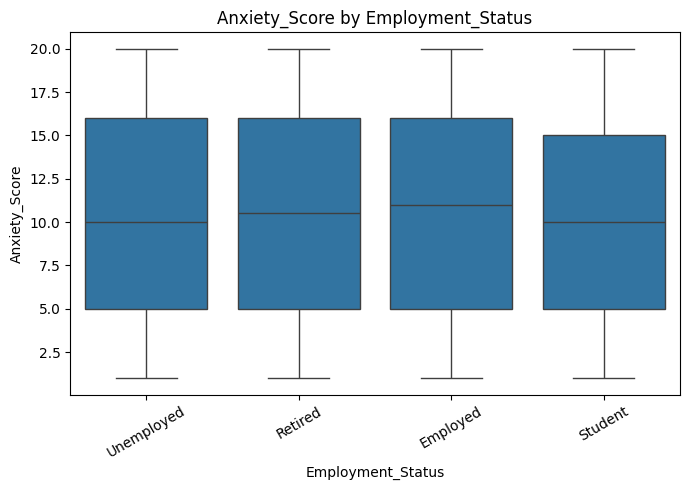

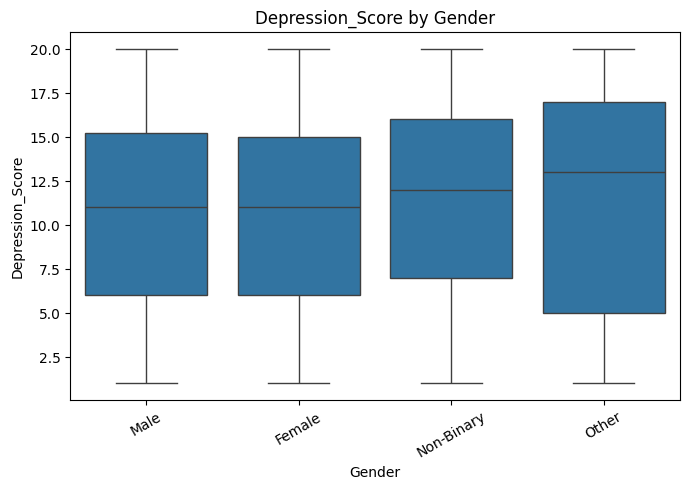

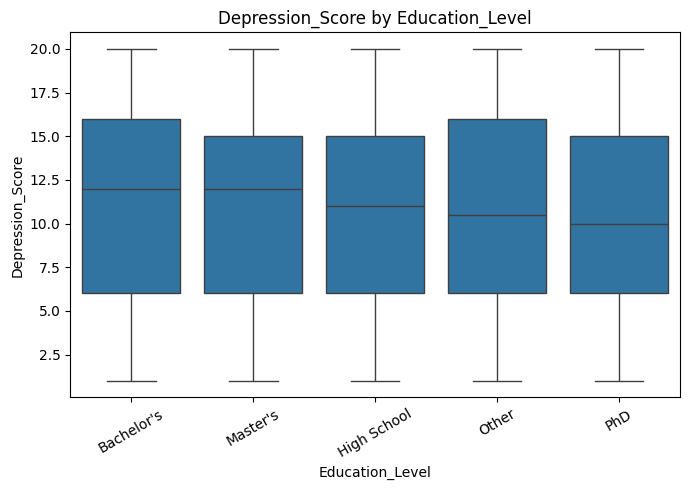

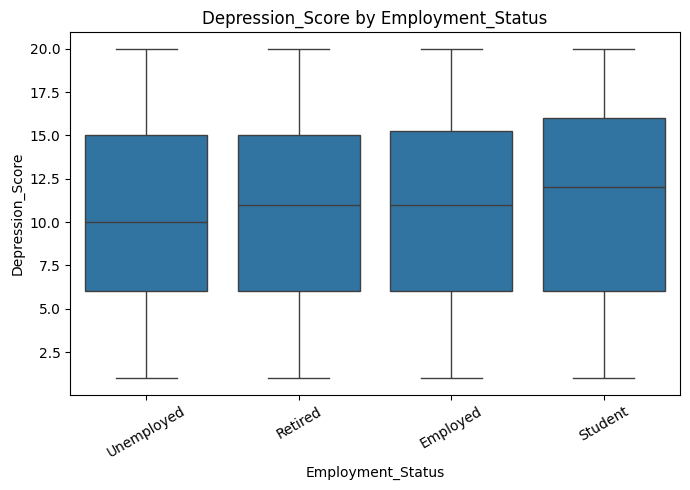

In [ ]:
categorical_cols = df2.select_dtypes(include=['object']).columns

for target in targets:
    for col in categorical_cols:
        plt.figure(figsize=(7,5))
        sns.boxplot(x=df2[col], y=df2[target])
        plt.title(f"{target} by {col}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()

# **Conclusion from EDA**

From the summary statistics and visualizations produced in this notebook, it seems as if there is minimal correlation between the two target variables we have isolated (depression score and anxiety score) and the predictors. There is a pretty even distribution for the targets, not a normal/bell distribution as we've come to expect for most of our datasets. The correlation heatmap and the scatter plots showed us that there is hardly any individual correlation between the non-binary numeric predictors and the target variables, and the box plots showed us the same thing for the binary numeric predictors and the categorical predictors, as the distributions of the target variables hardly changed at all for each value of those predictors. It will be interesting to see if we can apply any of the predictive models from class to determine any meaningful relationships between the predictors and depression and anxiety, given how little correlation we're seeing in the EDA.